## Ocean stratification

### loading the modules

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.ocean_stratification import Stratification
from aqua.diagnostics.ocean_stratification import PlotStratification


/home/bsc/bsc032946/.conda/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


### Initalizing the function

In [3]:
strat = Stratification(catalog='mn5-phase2', model='IFS-NEMO', exp='control-1990-freeze', source='lra-r100-monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='DEBUG')

In [19]:
strat.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "january"
    )

2025-09-26 13:04:14 :: Stratification :: INFO     -> Starting stratification diagnostic run.
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> AQUA installation found in /home/bsc/bsc032946/.aqua
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Configuration file found in /home/bsc/bsc032946/.aqua/config-aqua.yaml
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Available catalogs are ['mn5-phase2']
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Default catalog will be mn5-phase2
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Catalog file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/catalog.yaml
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Machine file is /home/bsc/bsc032946/.aqua/catalogs/mn5-phase2/machine.yaml
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to MN5
2025-09-26 13:04:14 :: ConfigPath :: DEBUG    -> Machine found in configuration file, se

### Plotting the data

In [21]:
strat.data.mld

<xarray.DataArray 'mld' (time: 12, lat: 13, lon: 17)> Size: 21kB
dask.array<fmin, shape=(12, 13, 17), dtype=float64, chunksize=(4, 13, 17), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 1990-01-01 1990-02-01 ... 1990-12-01
  * lat      (lat) float64 104B 52.5 53.5 54.5 55.5 56.5 ... 61.5 62.5 63.5 64.5
  * lon      (lon) float64 136B 300.0 301.0 302.0 303.0 ... 314.0 315.0 316.0
Attributes:
    standard_name:  level
    units:          NEMO model layers
    AQUA_model:     IFS-NEMO
    AQUA_exp:       control-1990-freeze
    AQUA_source:    lra-r100-monthly
    AQUA_catalog:   mn5-phase2
    AQUA_version:   0.18.0-alpha

/home/bsc/bsc032946/.conda/envs/aqua/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


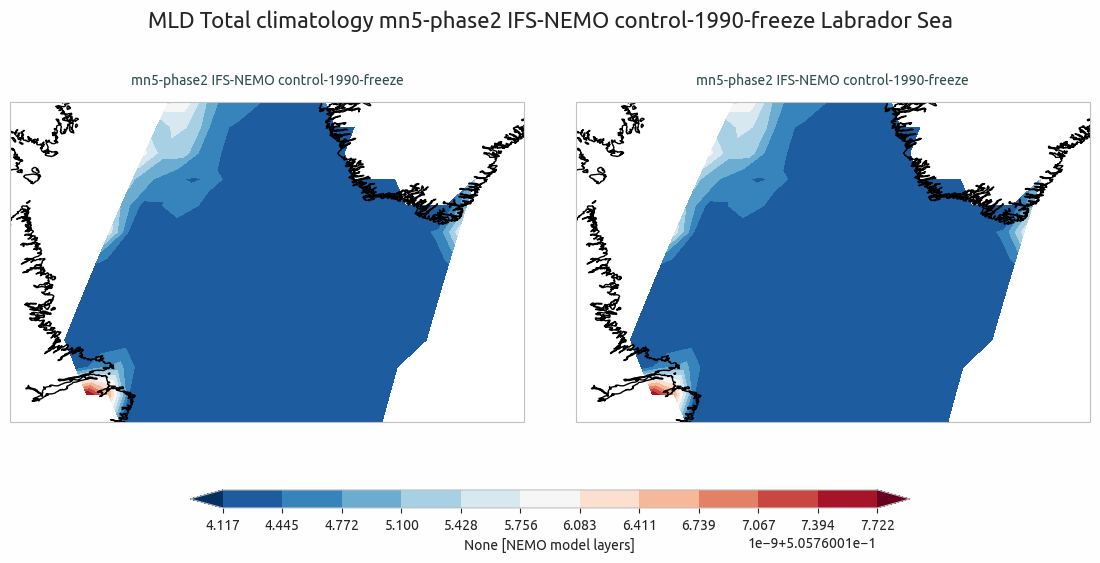

In [13]:
ps = PlotStratification(data=strat.data[["mld"]],
                        obs=strat.data[["mld"]],
                        # clim_time="January"
                        )
ps.plot_mld()

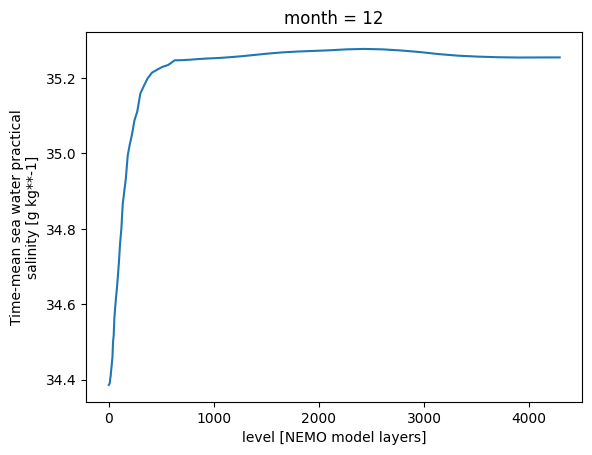

In [ ]:
strat.data.isel(month=11).so.plot()

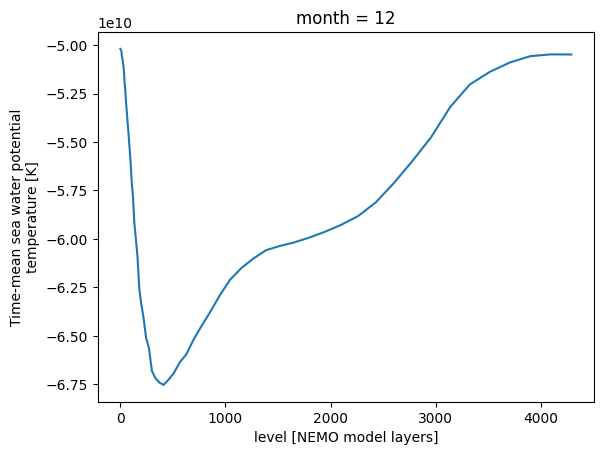

In [ ]:
strat.data.isel(month=11).rho.plot()

In [ ]:
strat.data.isel(month=11)

<xarray.Dataset> Size: 3kB
Dimensions:    (level: 75)
Coordinates:
  * level      (level) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level  (level) int64 600B dask.array<chunksize=(75,), meta=np.ndarray>
    month      int64 8B 12
Data variables:
    thetao     (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
    so         (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
    rho        (level) float64 600B dask.array<chunksize=(25,), meta=np.ndarray>
Attributes:
    history:             \n2025-07-31 18:54:19 AQUA💧: Retrieved from IFS-NEMO...
    AQUA_region:         Labrador Sea
    diagnostic:          ocean_circulation
    diagnostic_product:  stratification
    catalog:             mn5-phase2
    model:               IFS-NEMO
    exp:                 control-1990-freeze
    region:              Labrador Sea
    timestamp:           2025-07-31 18:54:20
    aqua_version:        0.17.0-alpha